## Spam Email Classifier with KNN using TF-IDF scores

1.   Assignment must be implemented in Python 3 only.
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for evaluation metrics, data visualization (matplotlib etc.).
3.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
4.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
5.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
6.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

**Task: Given an email, classify it as spam or ham**

Given input text file ("emails.txt") containing 5572 email messages, with each row having its corresponding label (spam/ham) attached to it.

This task also requires basic pre-processing of text (like removing stopwords, stemming/lemmatizing, replacing email_address with 'email-tag', etc..).

You are required to find the tf-idf scores for the given data and use them to perform KNN using Cosine Similarity.

In [1]:
# Supress all warnings
import warnings
warnings.filterwarnings('ignore')

### Import necessary libraries

In [2]:
import pandas as pd                  # For Data Pre-prcocessing.
import matplotlib.pyplot as plt      # For plotting graphs and visualization.
import nltk                          # For text pre-processing.
import numpy as np                   # For performing mathematical operations on vectors and matrices.
from sklearn.model_selection import train_test_split          # For splitting data into train and test dataset.
from sklearn.metrics import accuracy_score                    # For measuring the accuracy.
from sklearn.neighbors import KNeighborsClassifier            # For using sklearn's imbuit KNN classifier algorithm. 
import math                                                    # For math functions.
from sklearn.metrics import confusion_matrix                # For printing confusion matrix.
from sklearn.metrics import precision_recall_fscore_support     # For calculating precision recall.

### Load dataset

In [3]:
with open('emails.txt', 'r') as file:
    data = file.read()
emails=[]                           # emails list will store the emails.
labels=[]                           # labels list will store the labels(0 for spam and 1 for ham).
X=[]
for email in data.splitlines():
    datapoint=email.split("\t")
    if(datapoint[0]=='ham'):
      labels.append(1)
    else:
      labels.append(0)
    sample=[]
    X.append(datapoint[1])
    sample.append(datapoint[1])
    emails.append(sample)

emails=np.array(emails)           # Converting lists to numpy array for easy and efficient computation.
labels=np.array(labels)

### Preprocess data

*   List item
*   List item



In [4]:
#Preprocessing from Scratch.
#I am using NLTK library for text pre - processing. I think it is one of the best for text processing.
#Using Porter Stemmer.
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
# Steps done in preprocessing:
#1) Tokenization.
#2) Normalization[Conversion to lower character]                                
#3) Stemming (Porter Stemmer)
def tokenise(raw_data):
    # Tokenizing text and normalizing it..
    tokenizer = RegexpTokenizer(r'\w+')
    tokenisedText = tokenizer.tokenize(str(raw_data))
    tokenNormaliseText = []
    for word in tokenisedText:
        #Conversion to lower text.
        word = word.lower()
        tokenNormaliseText.append(word)
    return tokenNormaliseText

def stem(token_normalised_data):
    # Using Portel stemmer
    Stemmed_processed_text = []
    stemmer = PorterStemmer()
    for word in token_normalised_data:
        root = stemmer.stem(word)
        root = str(root)
        Stemmed_processed_text.append(root)
    return Stemmed_processed_text

In [5]:
# Processing each email in the dataset
emails_list=[]          # Contains preprocessed emails.
for email in emails:
    processed_text = tokenise(email)
    processed_text = stem(processed_text)
    emails_list.append(processed_text)
emails_list=np.array(emails_list)                                               

In [6]:
# Used 18% (approx 1000 emails) data for validation/testing.
train_data, validation_data, train_label, validation_label = train_test_split(emails_list, labels,test_size=0.18,random_state=42) 

In [7]:
totalNumberOfDocuments=len(train_data)
print("Total training examples:"+str(len(train_data)))
print("Total validation examples:"+str(len(validation_data)))

Total training examples:4570
Total validation examples:1004


In [8]:
#Vectorization of training data.
# Finding unique words in the processes text.
unique_words=set()
for email in train_data:
    for word in email:
        unique_words.add(word)
words=list(unique_words)
words.sort()

# Creating term frequency matrix first.
myMap={}        # Stores index to each word.
for i in range(0,len(words)):
    myMap[words[i]]=i
numberOfUniqueWords=len(unique_words)
tfIdfMatrix=[]
for email in train_data:
    vector=[0]*numberOfUniqueWords
    for word in email:              # Calculates term frequency for each word in a email at hand.
        index=myMap[word]
        vector[index]+=1
    tfIdfMatrix.append(vector)

# Creating tf-idf matrix.
vector_size=len(tfIdfMatrix[0])
matrix_size=len(tfIdfMatrix)
idf_array=[]
for i in range(0, vector_size):             
    idf_count=0
    for j in range(0,matrix_size):                                                
        if(tfIdfMatrix[j][i]!=0):
            idf_count+=1                # calculating document frequence for t
    log_idf=math.log(totalNumberOfDocuments/idf_count)
    idf_array.append(log_idf)
    for j in range(0,matrix_size):
        tfIdfMatrix[j][i]*=log_idf 
tfIdfMatrix = np.array(tfIdfMatrix)

In [9]:
#Vectorization of test data, Almost similar process as train data.
test_vectors=[]
for email in validation_data:
    vector=[0]*numberOfUniqueWords
    for word in email:
        if word in myMap.keys():
            index=myMap[word]
            vector[index]+=1
    test_vectors.append(vector)

for i in range(0,len(test_vectors)):
    for j in range(0, numberOfUniqueWords):
        temp=int(math.exp(idf_array[j]))+1
        log_temp=math.log(totalNumberOfDocuments/temp)      
        test_vectors[i][j]*=log_temp
test_vectors = np.array(test_vectors)

### Split data

### Train your KNN model (reuse previously implemented model built from 

*   List item

*   List item
*   List item


*   List item

scratch) and test on your data

In [10]:
# Extracting truth values:
truth_values=[]
for i in range(0,1000):
  truth_values.append(1-validation_label[i])
k_values=[1,3,5,7,9,11,17,23,28,33]

:***1. Experiment with different distance measures [Euclidean distance, Manhattan distance, Hamming Distance] and compare with the Cosine Similarity distance results.***

In [11]:
# Cosine Similarity scratch
import math
from scipy import spatial
def cosine(v1, v2):
    sim = spatial.distance.cosine(v1, v2)
    return sim

def KNN(test_mail, k):
    distances=[]
    index=0
    for email in tfIdfMatrix:                            # For each mail in train data.
        sim = cosine(test_mail, email)              # Calculating cosine for train mail with test instance.
        temp=[]                                     
        temp.append(sim)
        temp.append(train_label[index])             
        distances.append(temp)
        index+=1
    distances.sort()
    count_spam=0
    count_ham=0
    # Finding label using labels of k nearest neighbout.
    for i in range(0,k):
        if(distances[i][1]==0):
            count_spam+=1
        else:
            count_ham+=1
    if(count_spam>count_ham):
        predicted_label=0
    else:
        predicted_label=1
    return predicted_label

#Printing metrics.
spam=0
ham=0
cosine_prediction_scratch=[]
for i in range(0,1000):
  label=KNN(test_vectors[i],3)
  if(label==1):
    ham+=1
  else: 
    spam+=1
  cosine_prediction_scratch.append(1-label)
print("All the results for scratch for cosine similarity")
scratch_cosine_CFM = confusion_matrix(truth_values, cosine_prediction_scratch)
print("Confusion matrix")
print("             Predicted(Ham)  Predicted(Spam)")
print("Actual[Ham]   "+str(scratch_cosine_CFM[0][0])+"              "+ str(scratch_cosine_CFM[0][1]))
print("Actual[Spam]   "+str(scratch_cosine_CFM[1][0])+"              "+ str(scratch_cosine_CFM[1][1]))

scratch_cosine_results=precision_recall_fscore_support(truth_values, cosine_prediction_scratch,average='binary')
print("")
print("Precision        Recall          FScore")
print(scratch_cosine_results)
print("")


# Cosine Similarity Sklearn
print("All the results for skelearn's cosine similarity")
neighbours = KNeighborsClassifier(n_neighbors=3, metric='cosine')
neighbours = neighbours.fit(tfIdfMatrix, train_label)
spam=0
ham=0
inbuilt_prediction_cosine=[]
for i in range(0,1000):
    temp=test_vectors[i]
    temp=np.array(temp)
    label=neighbours.predict(temp.reshape(1,-1))
    if(label==0):
        spam+=1
    else:
        ham+=1
    inbuilt_prediction_cosine.append(1-label)

sklearns_cosine_CFM = confusion_matrix(truth_values, inbuilt_prediction_cosine)
print("Confusion matrix")
print("             Predicted(Ham)  Predicted(Spam)")
print("Actual[Ham]    "+str(sklearns_cosine_CFM[0][0])+"              "+ str(sklearns_cosine_CFM[0][1]))
print("Actual[Spam]   "+str(sklearns_cosine_CFM[1][0])+"              "+ str(sklearns_cosine_CFM[1][1]))
print("")
inbuilt_metrics_cosine=precision_recall_fscore_support(truth_values, inbuilt_prediction_cosine,average='binary')
print("Precision       Recall          FScore")
print(inbuilt_metrics_cosine)

All the results for scratch for cosine similarity
Confusion matrix
             Predicted(Ham)  Predicted(Spam)
Actual[Ham]   856              0
Actual[Spam]   43              101

Precision        Recall          FScore
(1.0, 0.7013888888888888, 0.8244897959183674, None)

All the results for skelearn's cosine similarity
Confusion matrix
             Predicted(Ham)  Predicted(Spam)
Actual[Ham]    856              0
Actual[Spam]   39              105

Precision       Recall          FScore
(1.0, 0.7291666666666666, 0.8433734939759037, None)


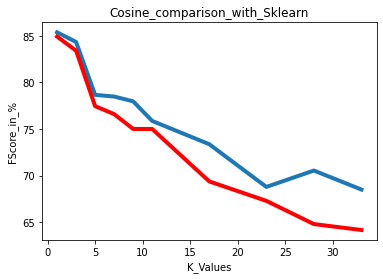

In [12]:
# Sklearn Cosine vs scratch cosine
import math
from scipy import spatial
def cosine(v1, v2):
    sim = 1 - spatial.distance.cosine(v1, v2)
    return sim

# Calculates all distances from every train example for a particular test instance.
def findAllDistances(test_email):
    distances=[]
    index=0
    for train_email in tfIdfMatrix:
        sim = cosine(test_email, train_email)
        temp=[]
        temp.append(sim)
        temp.append(train_label[index])
        distances.append(temp)
        index+=1
    distances.sort(reverse=True)
    return distances
printing('metrics')
all_predictions=[]                                              # Stores predictions for  k values for scratch.
for i in range(0,1000):
    distances=findAllDistances(test_vectors[i])
    predictions_for_k=[]
    for k in k_values:
        count_ham=0
        count_spam=0
        for i in range(0,k):
            if(distances[i][1]==0):
                count_spam+=1
            else:
                count_ham+=1
        if(count_spam>count_ham):
            predicted_label=0
        else:
            predicted_label=1 
        predictions_for_k.append(1-predicted_label)
    all_predictions.append(predictions_for_k)

def transpose(l1, l2):
    l2 =[[row[i] for row in l1] for i in range(len(l1[0]))]
    return l2

finalPredictions_cosine=[]
finalPredictions_cosine=transpose(all_predictions, finalPredictions_cosine)
FScores_for_scratch_cosine=[]
for row in finalPredictions_cosine:
    prfc=precision_recall_fscore_support(truth_values,row,average='binary')
    FScores_for_scratch_cosine.append(prfc[2]*100)

#Sklearn classifier-KNN
all_predictions_for_k=[]                            # Stores predictions for a all k values for each test innstance.
for k in k_values:
    inbuilt_prediction_for_k=[]
    spam=0
    ham=0
    neighbours = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    neighbours = neighbours.fit(tfIdfMatrix, train_label)
    for i in range(0,1000):
        temp=test_vectors[i]
        label=neighbours.predict(temp.reshape(1,-1))
        if(label==0):
            spam+=1
        else:
            ham+=1
        inbuilt_prediction_for_k.append(1-label)
    all_predictions_for_k.append(inbuilt_prediction_for_k)

FScores_for_inbuilt_cosine=[]                               # Stores FScores for all k values for sklearn. 
for row in all_predictions_for_k:
    k_vs_Fscore=precision_recall_fscore_support(truth_values,row,average='binary')
    FScores_for_inbuilt_cosine.append(k_vs_Fscore[2]*100)

# Blue line is Sklearn's and red line is from scratch.
print("Blue line is Sklearn's and red line is from scratch.")
fig, ax = plt.subplots()
ax.plot(k_values, FScores_for_inbuilt_cosine,linewidth=4.0,label='SkLearn')
ax.plot(k_values, FScores_for_scratch_cosine,linewidth=4.0,color='red',label='Mine')
plt.title('Cosine_comparison_with_Sklearn')
plt.xlabel("K_Values")
plt.ylabel("FScore_in_%")
plt.show()

In [22]:
# Euclid Similarity scratch
import math
def euclid_dist(v1, v2):
    dist= np.sqrt(np.sum(np.square(v1 - v2)))
    return dist

def KNN(test_mail, k):
    distances=[]
    index=0
    for email in tfIdfMatrix:                            # For each mail in train data.
        sim = euclid_dist(test_mail, email)              # Calculating cosine for train mail with test instance.
        temp=[]                                     
        temp.append(sim)
        temp.append(train_label[index])             
        distances.append(temp)
        index+=1
    distances.sort()
    count_spam=0
    count_ham=0
    # Finding label using labels of k nearest neighbour.
    for i in range(0,k):
        if(distances[i][1]==0):
            count_spam+=1
        else:
            count_ham+=1
    if(count_spam>count_ham):
        predicted_label=0
    else:
        predicted_label=1
    return predicted_label

spam=0
ham=0
euclid_prediction_scratch=[]                                                    # Stores FScores for all k values for scratch
for i in range(0,1000):
  label=KNN(test_vectors[i],3)
  if(label==1):
    ham+=1
  else: 
    spam+=1
  euclid_prediction_scratch.append(1-label)

print("All the results for scratch for euclid similarity")
scratch_euclid_CFM = confusion_matrix(truth_values, euclid_prediction_scratch)
print("Confusion matrix")
print("             Predicted(Ham)  Predicted(Spam)")
print("Actual[Ham]   "+str(scratch_euclid_CFM[0][0])+"              "+ str(scratch_euclid_CFM[0][1]))
print("Actual[Spam]   "+str(scratch_euclid_CFM[1][0])+"              "+ str(scratch_euclid_CFM[1][1]))

scratch_euclid_results=precision_recall_fscore_support(truth_values, euclid_prediction_scratch,average='binary')
print("")
print("Precision        Recall          FScore")
print(scratch_euclid_results)
print("")


# Euclid Similarity Sklearn
print("All the results for skelearn's euclid similarity")
neighbours = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neighbours = neighbours.fit(tfIdfMatrix, train_label)
spam=0
ham=0
inbuilt_prediction_euclid=[]                                                    # Stores FScores for all k values for sklearn. 
for i in range(0,1000):
    temp=test_vectors[i]
    temp=np.array(temp)
    label=neighbours.predict(temp.reshape(1,-1))
    if(label==0):
        spam+=1
    else:
        ham+=1
    inbuilt_prediction_euclid.append(1-label)

sklearns_euclid_CFM = confusion_matrix(truth_values, inbuilt_prediction_euclid)
print("Confusion matrix")
print("             Predicted(Ham)  Predicted(Spam)")
print("Actual[Ham]    "+str(sklearns_euclid_CFM[0][0])+"              "+ str(sklearns_euclid_CFM[0][1]))
print("Actual[Spam]   "+str(sklearns_euclid_CFM[1][0])+"              "+ str(sklearns_euclid_CFM[1][1]))
print("")
inbuilt_metrics_euclid=precision_recall_fscore_support(truth_values, inbuilt_prediction_euclid,average='binary')
print("Precision       Recall          FScore")
print(inbuilt_metrics_euclid)

All the results for scratch for euclid similarity
Confusion matrix
             Predicted(Ham)  Predicted(Spam)
Actual[Ham]   856              0
Actual[Spam]   114              30

Precision        Recall          FScore
(1.0, 0.20833333333333334, 0.3448275862068966, None)

All the results for skelearn's euclid similarity
Confusion matrix
             Predicted(Ham)  Predicted(Spam)
Actual[Ham]    856              0
Actual[Spam]   114              30

Precision       Recall          FScore
(1.0, 0.20833333333333334, 0.3448275862068966, None)


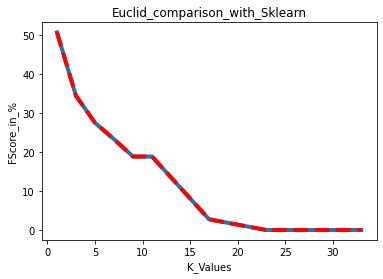

In [14]:
# Sklearn euclid vs scratch euclid
import math
def euclid_dist(v1, v2):
    dist= np.sqrt(np.sum(np.square(v1 - v2)))
    return dist

def findAllDistances(test_email):
    distances=[]
    index=0
    for train_email in tfIdfMatrix:
        sim = euclid_dist(test_email, train_email)
        temp=[]
        temp.append(sim)
        temp.append(train_label[index])
        distances.append(temp)
        index+=1
    distances.sort()
    return distances

scratch_all_predictions_euclid=[]                                       # Stores predictions for a all k values for each test innstance.
for i in range(0,1000):
    distances=findAllDistances(test_vectors[i])
    predictions_for_k=[]
    for k in k_values:
        count_ham=0
        count_spam=0
        for i in range(0,k):
            if(distances[i][1]==0):
                count_spam+=1
            else:
                count_ham+=1
        if(count_spam>count_ham):
            predicted_label=0
        else:
            predicted_label=1 
        predictions_for_k.append(1-predicted_label)
    scratch_all_predictions_euclid.append(predictions_for_k)

def transpose(l1, l2):
    l2 =[[row[i] for row in l1] for i in range(len(l1[0]))]
    return l2

scratch_finalPredictions_euclid=[]                                       # Stores predictions for a all k values for each test innstance.
scratch_finalPredictions_euclid=transpose(scratch_all_predictions_euclid, scratch_finalPredictions_euclid)
FScores_for_scratch_euclid=[]                                           # Stores Fscores for a all k values for each test innstance.
for row in scratch_finalPredictions_euclid:
    k_vs_Fscore=precision_recall_fscore_support(truth_values,row,average='binary')
    FScores_for_scratch_euclid.append(k_vs_Fscore[2]*100)

#Sklearn classifier-KNN
all_predictions_sklearn_euclid=[]
for k in k_values:
    inbuilt_prediction_for_k=[]
    spam=0
    ham=0
    neighbours = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    neighbours = neighbours.fit(tfIdfMatrix, train_label)
    for i in range(0,1000):
        temp=test_vectors[i]
        label=neighbours.predict(temp.reshape(1,-1))
        if(label==0):
            spam+=1
        else:
            ham+=1
        inbuilt_prediction_for_k.append(1-label)
    all_predictions_sklearn_euclid.append(inbuilt_prediction_for_k)

FScores_for_sklearn_euclid=[]                                                    # Stores Fscores for a all k values for each test innstance.
for row in all_predictions_sklearn_euclid:
    k_vs_Fscore=precision_recall_fscore_support(truth_values,row,average='binary')
    FScores_for_sklearn_euclid.append(k_vs_Fscore[2]*100)

# Blue line is Sklearn's and red line is from scratch.
print("red: scratch, blue: sklearn")
fig, ax = plt.subplots()
ax.plot(k_values, FScores_for_sklearn_euclid,linewidth=4.0,label='SkLearn')
ax.plot(k_values, FScores_for_scratch_euclid,linewidth=4.0,color='red',label='Mine',linestyle='dashed')
plt.title('Euclid_comparison_with_Sklearn')
plt.xlabel("K_Values")
plt.ylabel("FScore_in_%")
plt.show()

In [16]:
# Manhat Similarity scratch
import math
def manhatton_dist(v1, v2):
    sim=np.sum(abs(v1-v2))
    return sim

def KNN(test_mail, k):
    distances=[]
    index=0
    for email in tfIdfMatrix:                            # For each mail in train data.
        sim = manhatton_dist(test_mail, email)              # Calculating cosine for train mail with test instance.
        temp=[]                                     
        temp.append(sim)
        temp.append(train_label[index])             
        distances.append(temp)
        index+=1
    distances.sort()
    count_spam=0
    count_ham=0
    # Finding label using labels of k nearest neighbour.
    for i in range(0,k):
        if(distances[i][1]==0):
            count_spam+=1
        else:
            count_ham+=1
    if(count_spam>count_ham):
        predicted_label=0
    else:
        predicted_label=1
    return predicted_label

spam=0
ham=0
manhat_prediction_scratch=[]
for i in range(0,1000):
  label=KNN(test_vectors[i],3)
  if(label==1):
    ham+=1
  else: 
    spam+=1
  manhat_prediction_scratch.append(1-label)
print("All the results for scratch for manhattan similarity")
scratch_manhat_CFM = confusion_matrix(truth_values, manhat_prediction_scratch)
print("Confusion matrix")
print("             Predicted(Ham)  Predicted(Spam)")
print("Actual[Ham]   "+str(scratch_manhat_CFM[0][0])+"              "+ str(scratch_manhat_CFM[0][1]))
print("Actual[Spam]   "+str(scratch_manhat_CFM[1][0])+"              "+ str(scratch_manhat_CFM[1][1]))

scratch_manhat_results=precision_recall_fscore_support(truth_values, manhat_prediction_scratch,average='binary')
print("")
print("Precision        Recall          FScore")
print(scratch_manhat_results)
print("")

# Manhat Similarity Sklearn
print("All the results for skelearn's manhattan similarity")
neighbours = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
neighbours = neighbours.fit(tfIdfMatrix, train_label)
spam=0
ham=0
inbuilt_prediction_euclid=[]
for i in range(0,1000):
    temp=test_vectors[i]
    temp=np.array(temp)
    label=neighbours.predict(temp.reshape(1,-1))
    if(label==0):
        spam+=1
    else:
        ham+=1
    inbuilt_prediction_euclid.append(1-label)

sklearns_manhat_CFM = confusion_matrix(truth_values, inbuilt_prediction_euclid)
print("Confusion matrix")
print("             Predicted(Ham)  Predicted(Spam)")
print("Actual[Ham]    "+str(sklearns_manhat_CFM[0][0])+"              "+ str(sklearns_manhat_CFM[0][1]))
print("Actual[Spam]   "+str(sklearns_manhat_CFM[1][0])+"              "+ str(sklearns_manhat_CFM[1][1]))
print("")
inbuilt_metrics_manhat=precision_recall_fscore_support(truth_values, inbuilt_prediction_euclid,average='binary')
print("Precision       Recall          FScore")
print(inbuilt_metrics_manhat)

All the results for scratch for manhattan similarity
Confusion matrix
             Predicted(Ham)  Predicted(Spam)
Actual[Ham]   856              0
Actual[Spam]   114              30

Precision        Recall          FScore
(1.0, 0.20833333333333334, 0.3448275862068966, None)

All the results for skelearn's manhattan similarity
Confusion matrix
             Predicted(Ham)  Predicted(Spam)
Actual[Ham]    856              0
Actual[Spam]   114              30

Precision       Recall          FScore
(1.0, 0.20833333333333334, 0.3448275862068966, None)


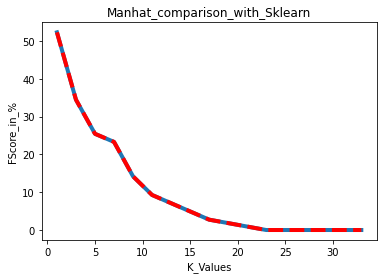

In [18]:
# Sklearn manhat vs scratch manhat
import math
def manhat_dist(v1, v2):
    dist= np.sum(abs(v1 - v2))
    return dist

def findAllDistances(test_email):
    distances=[]
    index=0
    for train_email in tfIdfMatrix:
        sim = manhat_dist(test_email, train_email)
        temp=[]
        temp.append(sim)
        temp.append(train_label[index])
        distances.append(temp)
        index+=1
    distances.sort()
    return distances

scratch_all_predictions_manhat=[]
for i in range(0,1000):
    distances=findAllDistances(test_vectors[i])
    predictions_for_k=[]
    for k in k_values:
        count_ham=0
        count_spam=0
        for i in range(0,k):
            if(distances[i][1]==0):
                count_spam+=1
            else:
                count_ham+=1
        if(count_spam>count_ham):
            predicted_label=0
        else:
            predicted_label=1 
        predictions_for_k.append(1-predicted_label)
    scratch_all_predictions_manhat.append(predictions_for_k)

def transpose(l1, l2):
    l2 =[[row[i] for row in l1] for i in range(len(l1[0]))]
    return l2

scratch_finalPredictions_manhat=[]
scratch_finalPredictions_manhat=transpose(scratch_all_predictions_manhat, scratch_finalPredictions_manhat)
FScores_for_scratch_manhat=[]
for row in scratch_finalPredictions_manhat:
    k_vs_Fscore=precision_recall_fscore_support(truth_values,row,average='binary')
    FScores_for_scratch_manhat.append(k_vs_Fscore[2]*100)

#Sklearn classifier-KNN
all_predictions_sklearn_manhat=[]
for k in k_values:
    inbuilt_prediction_for_k=[]
    spam=0
    ham=0
    neighbours = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    neighbours = neighbours.fit(tfIdfMatrix, train_label)
    for i in range(0,1000):
        temp=test_vectors[i]
        label=neighbours.predict(temp.reshape(1,-1))
        if(label==0):
            spam+=1
        else:
            ham+=1
        inbuilt_prediction_for_k.append(1-label)
    all_predictions_sklearn_manhat.append(inbuilt_prediction_for_k)

FScores_for_sklearn_manhat=[]
for row in all_predictions_sklearn_manhat:
    k_vs_Fscore=precision_recall_fscore_support(truth_values,row,average='binary')
    FScores_for_sklearn_manhat.append(k_vs_Fscore[2]*100)

# Blue line is Sklearn's and red line is from scratch.
print("red: scratch, blue: sklearn")
fig, ax = plt.subplots()
ax.plot(k_values, FScores_for_sklearn_manhat,linewidth=4.0,label='SkLearn')
ax.plot(k_values, FScores_for_scratch_manhat,linewidth=4.0,color='red',label='Mine',linestyle='dashed')
plt.title('Manhat_comparison_with_Sklearn')
plt.xlabel("K_Values")
plt.ylabel("FScore_in_%")
plt.show()

:***1. Experiment with different distance measures [Euclidean distance, Manhattan distance, Hamming Distance] and compare with the Cosine Similarity distance results.***

In [19]:
# Comparision for k value = 3
#Prints metrics for all similarity functions for k=3.
import math
def truncate(number) -> float:
    digits=3
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

comparision_matrix=[]
headings=['Distance','Precision', 'Recall','F-Score']
cosine_row=['Cosine',truncate(scratch_cosine_results[0]),truncate(scratch_cosine_results[1]),truncate(scratch_cosine_results[2])]
euclid_row=['Euclid',truncate(scratch_euclid_results[0]),truncate(scratch_euclid_results[1]),truncate(scratch_euclid_results[2])]
manhatton_row=['Manhat',truncate(scratch_manhat_results[0]),truncate(scratch_manhat_results[1]),truncate(scratch_manhat_results[2])]
comparision_matrix.append(headings)
comparision_matrix.append(cosine_row)
comparision_matrix.append(euclid_row)
comparision_matrix.append(manhatton_row)

for item in comparision_matrix[0]:
    print(item,end=' ')
print(' ')
for i in range(1,len(comparision_matrix)):
    for j in range(0, len(comparision_matrix[0])):
        print(comparision_matrix[i][j],end='\t  ')
    print(' ')

Distance Precision Recall F-Score  
Cosine	  1.0	  0.701	  0.824	   
Euclid	  1.0	  0.208	  0.344	   
Manhat	  1.0	  0.208	  0.344	   


***4. Choose different K values (k=1,3,5,7,11,17,23,28) and experiment. Plot a graph showing R2 score vs k.***

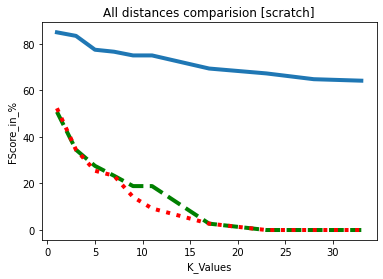

In [24]:
# Comparsion of scratch implementation. [Graph]
# Comparision of all the fscore vs k for alldistance functions.
print("Blue: cosine, green: euclidean, red: manhat")
fig, ax = plt.subplots()
ax.plot(k_values, FScores_for_scratch_cosine,linewidth=4.0,label='cosine')
ax.plot(k_values, FScores_for_scratch_euclid,linewidth=4.0,color='green',label='euclidean',linestyle='dashed')
ax.plot(k_values, FScores_for_scratch_manhat,linewidth=4.0,color='red',label='manhat',linestyle='dotted')
plt.title('All distances comparision [scratch]')
plt.xlabel("K_Values")
plt.ylabel("FScore_in_%")
plt.show()

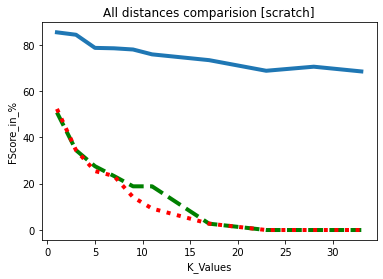

In [21]:
# Comparsion of sklearn implementation. [Graph]
# Comparision of all the fscore vs k for alldistance functions.
print("Blue: cosine, green: euclidean, red: manhat")
fig, ax = plt.subplots()
ax.plot(k_values, FScores_for_inbuilt_cosine,linewidth=4.0,label='cosine')
ax.plot(k_values, FScores_for_sklearn_euclid,linewidth=4.0,color='green',label='euclidean',linestyle='dashed')
ax.plot(k_values, FScores_for_sklearn_manhat,linewidth=4.0,color='red',label='manhat',linestyle='dotted')
plt.title('All distances comparision [scratch]')
plt.xlabel("K_Values")
plt.ylabel("FScore_in_%")
plt.show()

***2. Explain which distance measure works best and why? Explore the distance measures and weigh their pro and cons in different application settings.***[link text](https:// [link text](https://))


Cosine similarity distance measure works best. It is because it measures the angle between two n-dimensional vector. And thus more the cosine similarity, less the angle between them. It captures our intuition of similar vector here in this application. However there is no clear winner amongst the distance metrics when we apply KNN. Sometimes KNN works better, sometimes euclidean distance measure works better and some times other distance measure.

For this application setting, we need to improve speed as well as recall and precision.
Higher the recall rate, better predictions it makes. It is also important to optimize precision but recall is more important. It is okay if the speed is little less or the system has a bit more latency. As the most of the times, our mail application will classify the mail beforehand and then report it to the user. Thus we should the distance measures that increases the precison and recall.

And it is evident from the above results that cosine distance works best for this application setting. It gives highest precision, recall and fscore. 
But cosine is mathematically expensive operation. It has many unit operations as compared to other similarity functions. Thus distances like euclidean or manhat can be found useful when latency is critical. 
Needless to say but each similarit function captures some intuition and is best for some subset of problems.

***3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form***

Done above for precision, recall, f1-score.

### Train and test Sklearn's KNN classifier model on your data (use metric which gave best results on your experimentation with built-from-scratch model.)

***Compare both the models result.***

```
As discussed above, cosine similarity is performs best among other similarity functions that we have taken into consideration(Euclidean, manhattan). 
For euclidean and manhattan my implementation and sklearn's KNN are giving extacty same outputs.

But in case of cosine similarity, sklearn's KNN gives slightly better results.
All the graphs follow the same trend. As the k value increases the F1-score decreases.
It is because the dataset is skewed. And in most real life cases, the datasets that we get are skewed. We can apply simple solutions like:-
1) Data Augmentation 
```

***What is the time complexity of training using KNN classifier?***

Time complexity of KNN classifier:-
O(Number of train examples * Number of latent features) 
For each test case, we compare the feature of the test instance with every faeture in the train dataset. Comparision of each feature vector takes O(number of latent features time).

***What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?***